# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle

##from Classification import Classification
##from Ensemble import Ensemble

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set_context('poster')

In [3]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data.csv')

In [4]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data.csv')
y_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data.csv')

In [5]:
print(x_train.shape)
print(y_train.shape)

(13208, 175)
(13208, 1)


In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23917 entries, 0 to 23916
Columns: 194 entries, able to year
dtypes: float64(194)
memory usage: 35.4 MB


In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  13208 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [8]:
y_train = y_train.fillna((y_train.mean()))

In [9]:
y_train = y_train.astype(np.int64)

# Train and Validation Split

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['rating'],test_size=.25,random_state=42)

In [11]:
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Modelling

# LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
Log_reg = pipe.fit(x_train, y_train)  # apply scaling on training data

In [14]:
Log_reg.score(x_val, y_val)

0.4715324046032707

Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(Log_reg, x_val, y_val, cv=5)

array([0.46898638, 0.44931921, 0.44090909, 0.46515152, 0.44242424])

**Grid Search** Çalışmıyor

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2'],
          'C':[0.01,0.05,0.1,0.5,1,5,10]}

grid_log_reg = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(random_state=0),
                                 params,
                                 cv=5,
                                 refit=True))

In [17]:
y_train_ravel = y_train.values.ravel()

In [18]:
grid_log_reg.fit(x_train, y_train_ravel);

In [19]:
grid_log_reg.best_estimator_

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'

# Decision Tree

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))
dec_tree_1 = pipe.fit(x_train, y_train)  # apply scaling on training data

In [21]:
pipe.score(x_val, y_val)

0.33161720169594183

Cross Validation

In [22]:
from sklearn.model_selection import train_test_split
cross_val_score(dec_tree_1, x_val, y_val, cv=5)

array([0.32980333, 0.32980333, 0.32575758, 0.2969697 , 0.31363636])

Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,4,5,6,7,8,9]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=7)

In [24]:
grid.fit(x_train, y_train);

In [25]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 100}

In [26]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, random_state=0)


Best Estimator

In [27]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=9,min_samples_leaf=100,random_state=0))
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=100,
                                        random_state=0))])

In [28]:
pipe.score(x_val, y_val)

0.34463961235614776

Grid Search 2

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[3,4,5],
          'max_depth':[7,8,9,10]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=7)

In [30]:
grid.fit(x_train, y_train);

In [31]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5}

In [32]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

Best Estimator 2

In [39]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0))
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                        random_state=0))])

In [40]:
pipe.score(x_val, y_val)

0.4270903010033445

# Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
pipe= RandomForestClassifier(max_depth=2, random_state=0)
random_forest = pipe.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [301]:
random_forest.score(x_val, y_val)

0.36538461538461536

Cross Validation

In [302]:
cross_val_score(random_forest, x_val, y_val, cv=5)

array([0.36538462, 0.36538462, 0.36538462, 0.36538462, 0.36538462])

Grid Search

In [303]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,5,7,9,11,13,15]}

grid = GridSearchCV(RandomForestClassifier(random_state=0), params, cv=7)

In [307]:
grid.fit(x_train, y_train_ravel);

KeyboardInterrupt: ignored

In [ ]:
grid.best_params_

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [47]:
from sklearn.model_selection import GridSearchCV

params =  {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid = GridSearchCV(MultinomialNB(), params, cv=7)

In [50]:
grid.fit(x_train, y_train_ravel);

ValueError: Invalid parameter 'var_smoothing' for estimator MultinomialNB(). Valid parameters are: ['alpha', 'class_prior', 'fit_prior'].

<AxesSubplot:>

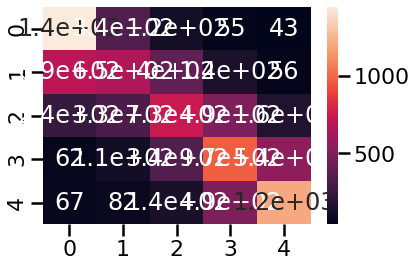

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)

sns.heatmap(cm, annot=True)

<AxesSubplot:>

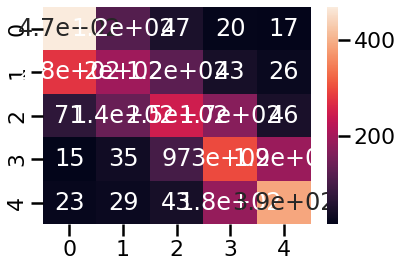

In [40]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.55      0.70      0.62       668
           2       0.38      0.29      0.33       662
           3       0.44      0.37      0.40       670
           4       0.42      0.47      0.44       635
           5       0.58      0.58      0.58       668

    accuracy                           0.48      3303
   macro avg       0.47      0.48      0.47      3303
weighted avg       0.48      0.48      0.48      3303

